In [ ]:
# https://zhuanlan.zhihu.com/p/692810462 RF
# https://zhuanlan.zhihu.com/p/692505141 SVM

# https://zhuanlan.zhihu.com/p/112009086 Xboost

In [151]:
setwd('/import/DB/fel/BJTC-204')

In [152]:
load('./exp4.rda')

In [153]:
head(exp4)

,death,TYPE,PH,Gender,race,Age,GSM,NAT2,ADA,CDH2,...,HNRPDL,DMTF1,PPP4R1,CDH1,SLC12A6,ROD1,KCNE2,DGCR2,CASP8AP2,SCO2
,<int>,<chr>,<dbl>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GSM2431721,0,Control,6.97,M,Caucasian,32,GSM2431721,6.918508,5.958536,7.389671,...,8.062601,8.039051,6.266754,4.402844,6.107446,5.091350,7.473668,7.085446,5.301909,5.986224
GSM2431722,0,Control,7.01,F,Caucasian,63,GSM2431722,6.397328,6.113981,7.629390,...,9.066047,8.447141,6.887356,4.383695,5.726334,4.867468,7.710730,7.402328,5.598268,6.171961
GSM2431723,0,Control,NA,F,Caucasian,70,GSM2431723,6.814676,6.261580,7.571414,...,8.630200,8.170023,6.914393,4.441707,5.981377,4.979711,7.519356,7.314417,5.538427,5.854754
GSM2431726,0,Control,NA,M,Caucasian,71,GSM2431726,7.550068,6.640444,8.030948,...,6.794395,7.583125,6.374021,4.632824,6.542643,5.345686,8.181581,6.815460,5.552289,6.125526
GSM2431727,0,Control,6.87,M,Caucasian,44,GSM2431727,6.336289,6.297053,7.947093,...,9.055285,8.653470,6.902694,4.552302,5.629537,5.043913,7.322026,7.413795,5.617718,5.891519
GSM2431728,0,MDD,7.05,M,Caucasian,66,GSM2431728,6.266404,5.972297,7.826966,...,8.993547,8.454228,6.859039,4.488690,5.823510,4.932490,7.483323,7.521739,5.512290,6.347157


In [154]:
gene19 = read.table('./gene77.txt',col.names = 'gene')

In [155]:
model.gene = intersect(gene19$gene,colnames(exp4))

In [156]:
expr = exp4[,c('TYPE',model.gene)]

In [157]:
expr$TYPE = ifelse(expr$TYPE == 'Control',0,1)

In [158]:
library(caret)
library(ggplot2)

 a = c()

for (i in model.gene){
    res<-pROC::roc(TYPE~expr[,i],data=expr,aur=TRUE,
         ci=TRUE, # 显示95%CI
         #percent=TRUE, # 是否需要以百分比显示
         smooth=FALSE,# 是否平滑曲线
         levels=c(0,1),direction="<" #设置分组方向
         )
    if (res$auc > 0.5){
        a = append(a,i)
        print(paste0(i,' ',res$auc))
        p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
  theme_bw() + # 设置背景
  ggtitle(paste0(i," ROC Curve"))+
  theme(plot.title = element_text(hjust = 0.5,size = 16),
        axis.text=element_text(size=12,colour = "black"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))
p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
  annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
    ggsave(file = paste0(i,'.ROC.pdf'))
}else{
        
}

    
    }

[1] "ABCB6 0.526842105263158"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "AHSA1 0.52781954887218"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PWP1 0.586541353383459"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ZNF365 0.546992481203007"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "DDN 0.575413533834586"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "RSL1D1 0.611654135338346"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "LTA4H 0.531578947368421"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ARNTL 0.593233082706767"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PCDH8 0.574661654135338"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "WAC 0.613759398496241"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "TMBIM4 0.504210526315789"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PRUNE 0.549774436090226"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SAFB 0.529624060150376"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 251 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "MICAL1 0.553759398496241"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "YIPF2 0.509774436090226"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "C1orf115 0.594135338345865"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 250 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "NCOA4 0.503082706766917"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ST6GALNAC5 0.576992481203008"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "CHAF1B 0.537142857142857"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 251 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "CASP1 0.500751879699248"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SIP1 0.531353383458647"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "CBX4 0.521428571428571"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 251 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "BHLHE40 0.517443609022556"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ZW10 0.503157894736842"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "DLGAP2 0.51390977443609"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "MED7 0.545112781954887"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 251 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "NR1D1 0.547067669172932"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "CNGB1 0.529172932330827"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ERCC1 0.640827067669173"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ETV5 0.529699248120301"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ATP8A2 0.648045112781955"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SLC25A38 0.539248120300752"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "WDYHV1 0.549624060150376"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "KLHL26 0.517932330827068"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 251 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "PSMB3 0.566616541353383"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SC4MOL 0.547744360902256"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SDCBP 0.536353383458647"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 251 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ELOVL4 0.590601503759398"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "SF3A2 0.558947368421053"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


[1] "ITM2B 0.507744360902256"


Saving 6.67 x 6.67 in image
Warning message in geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color = "darkgrey", :
"All aesthetics have length 1, but the data has 252 rows.
i Please consider using `annotate()` or provide this layer with data containing
  a single row."


In [159]:
a

[1] "ABCB6"      "AHSA1"      "PWP1"       "ZNF365"     "DDN"       
 [6] "RSL1D1"     "LTA4H"      "ARNTL"      "PCDH8"      "WAC"       
[11] "TMBIM4"     "PRUNE"      "SAFB"       "MICAL1"     "YIPF2"     
[16] "C1orf115"   "NCOA4"      "ST6GALNAC5" "CHAF1B"     "CASP1"     
[21] "SIP1"       "CBX4"       "BHLHE40"    "ZW10"       "DLGAP2"    
[26] "MED7"       "NR1D1"      "CNGB1"      "ERCC1"      "ETV5"      
[31] "ATP8A2"     "SLC25A38"   "WDYHV1"     "KLHL26"     "PSMB3"     
[36] "SC4MOL"     "SDCBP"      "ELOVL4"     "SF3A2"      "ITM2B"

In [160]:
expr4 = expr[,c('TYPE',a)]

### 单因素分析

In [161]:
#结果合并需要的包
library(plyr)
#可进行logistic回归的包
library(rms)#可实现逻辑回归模型（lrm）
library(epiDisplay)#快速输出OR、95%CI、P
#library(gtsummary)#精美三线表（但，95%CI有误）

varsU<-names(expr4[,2:dim(expr4)[2]])

Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(TYPE~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   #添加变量名
  Result<-rbind(Result,result1[-1,])#[-1,],删除常数项
}

Result

Uni_log<-data.frame(Result[,c(1,4:8)]) #提取"P","OR","CIlower","CIupper"和变量名

colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")#变量重命名

ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.01]) 

tzgene = Uni_log %>% dplyr::filter(P < 0.01) %>% rownames()

Uni_log[tzgene,]

### 多因素分析

tzgene

#data = expr4[,c('Group',tzgene)]

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

W

,Estimate,Std..Error,z.value,Pr...z..,OR,X2.5..,X97.5..,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
ABCB6,0.25512783,0.4429539,0.57596920,0.5646360024,1.2906266,0.54365400,3.104680,ABCB6
AHSA1,0.22544376,0.3269474,0.68954132,0.4904826805,1.2528786,0.66952376,2.433183,AHSA1
PWP1,0.91308290,0.4420187,2.06571089,0.0388557869,2.4919933,1.07943970,6.143076,PWP1
ZNF365,0.38193856,0.2414348,1.58195343,0.1136602019,1.4651221,0.94399510,2.459450,ZNF365
DDN,0.85284186,0.3652513,2.33494514,0.0195462869,2.3463053,1.17617790,4.945488,DDN
RSL1D1,1.32932246,0.4898820,2.71355657,0.0066565202,3.7784825,1.46458515,10.054395,RSL1D1
LTA4H,0.53818769,0.4533452,1.18714776,0.2351693443,1.7128997,0.71904456,4.286127,LTA4H
ARNTL,1.22074929,0.5524561,2.20967668,0.0271276093,3.3897267,1.16432410,10.260624,ARNTL
PCDH8,0.22646360,0.1182608,1.91495079,0.0554987791,1.2541570,0.99683578,1.587048,PCDH8


,Estimate,P,OR,CIlower,CIupper,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
RSL1D1,1.329322,0.0066565202,3.778482,1.464585,10.05440,RSL1D1
ERCC1,2.355130,0.0005969738,10.539495,2.853004,42.44946,ERCC1
ATP8A2,1.746862,0.0032852105,5.736573,1.845505,19.19373,ATP8A2


[1] "RSL1D1" "ERCC1"  "ATP8A2"

In [93]:
write.table(data.frame(gene = tzgene),file = 'gene19.res.txt')

In [85]:
write.table(data.frame(gene = tzgene),file = 'gene32.res.txt')

In [162]:
write.table(data.frame(gene = tzgene),file = 'gene77.res.txt')

In [150]:
write.table(data.frame(gene = tzgene),file = 'gene3639.res.txt')

In [51]:
y = ifelse(Type == 'Control',0,1)

In [52]:
y

[1] 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 1 1 0 0 0 1 1
 [38] 0 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 [75] 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
[112] 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 0 1 1 0
[149] 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0
[186] 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
[223] 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

In [53]:
library(dplyr)

In [10]:
x = as.matrix(expr)
y = y

In [11]:
library(randomForest)

Warning message:
"package 'randomForest' was built under R version 4.2.3"
randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: 'randomForest'


The following object is masked from 'package:dplyr':

    combine




In [13]:
set.seed(103)

In [14]:
rf = randomForest(as.factor(y)~.,data = x,ntree =1000,important=TRUE,proximity=TRUE)

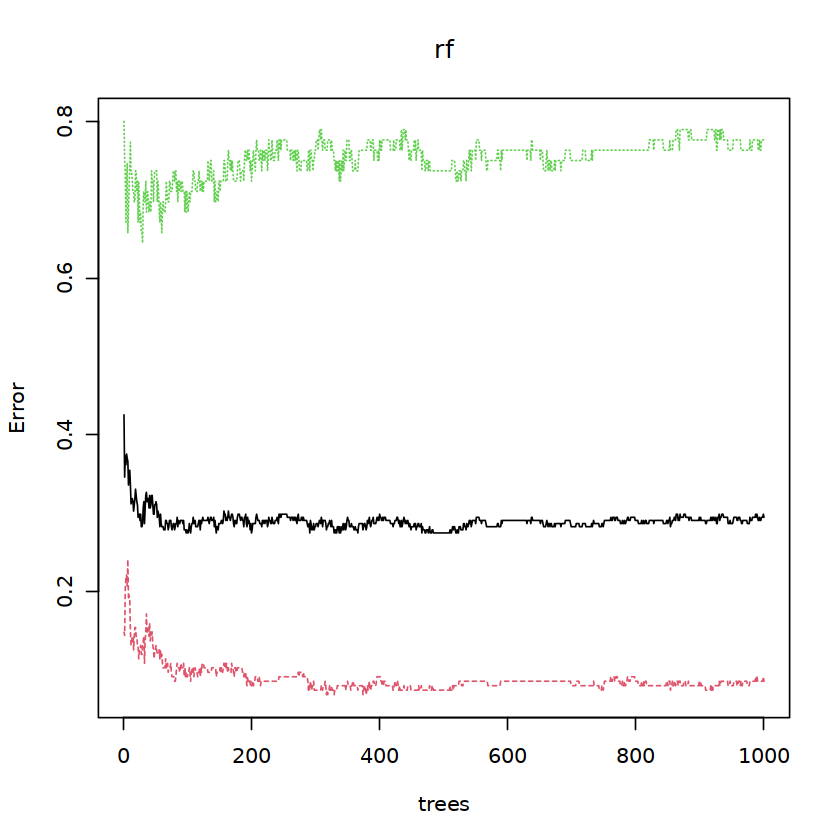

In [15]:
plot(rf)

In [21]:
library(ggplot2)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"

Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin




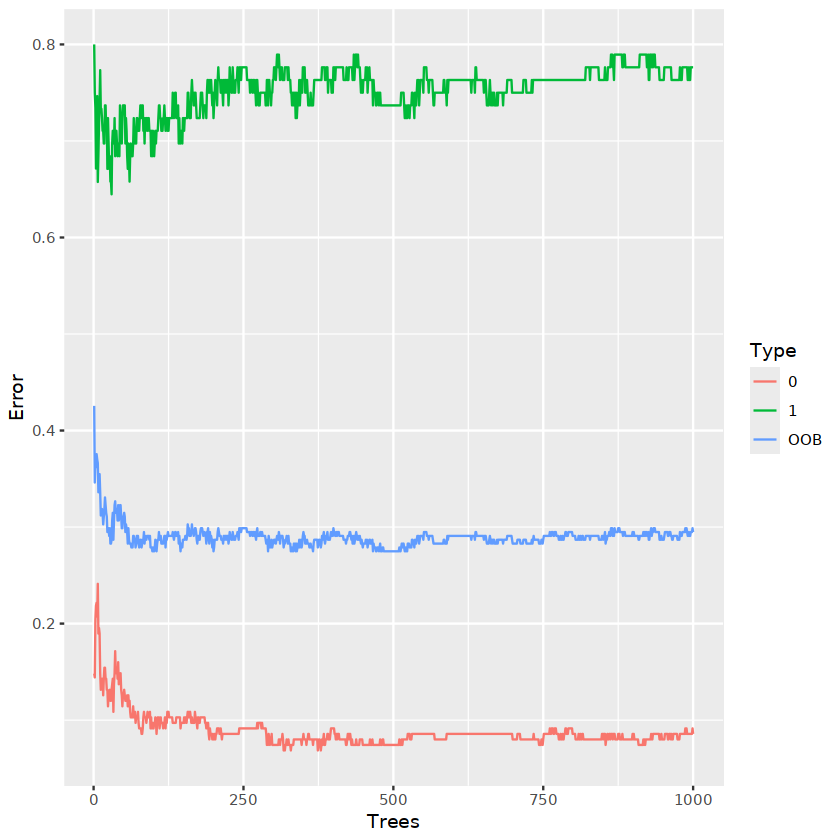

In [22]:
oob.error.data <- data.frame(
  Trees=rep(1:nrow(rf$err.rate), times=3),
  Type=rep(c("OOB", "0", "1"), each=nrow(rf$err.rate)),
  Error=c(rf$err.rate[,"OOB"],
          rf$err.rate[,"0"],
          rf$err.rate[,"1"]))

ggplot(data=oob.error.data, aes(x=Trees, y=Error)) +
  geom_line(aes(color=Type))

In [27]:
oob.values <- vector(length=10)
for(i in 1:10) {
  temp.model <- randomForest(as.factor(y) ~ ., data=x, mtry=i, ntree=1000)
  oob.values[i] <- temp.model$err.rate[nrow(temp.model$err.rate),1]
}

In [28]:
oob.values

[1] 0.2749004 0.2948207 0.2868526 0.2828685 0.2868526 0.2948207 0.3107570
 [8] 0.3027888 0.2828685 0.2828685

In [39]:
model <- randomForest(as.factor(y) ~ ., data=x, ntree=1000, proximity=TRUE)

In [40]:
distance.matrix <- dist(1-model$proximity)
mds.stuff <- cmdscale(distance.matrix, eig=TRUE, x.ret=TRUE,k  =3)

In [41]:
mds.var.per <- round(mds.stuff$eig/sum(mds.stuff$eig)*100, 1)

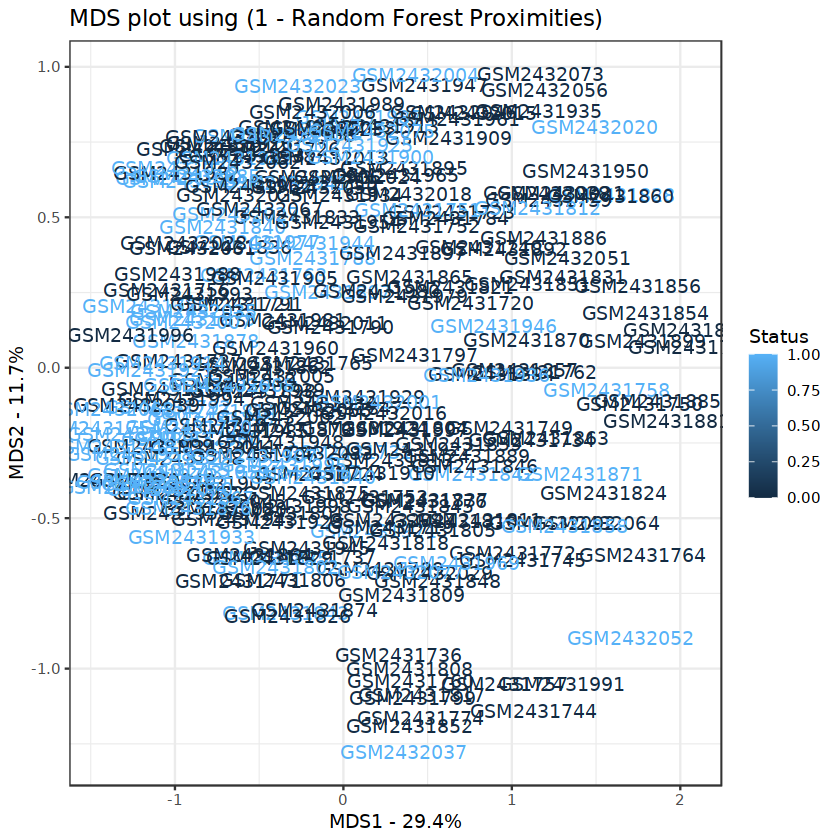

In [43]:
mds.values <- mds.stuff$points
mds.data <- data.frame(Sample=rownames(mds.values),
                       X=mds.values[,1],
                       Y=mds.values[,2],
                       Status=y)

ggplot(data=mds.data, aes(x=X, y=Y, label=Sample)) +
  geom_text(aes(color=Status)) +
  theme_bw() +
  xlab(paste("MDS1 - ", mds.var.per[1], "%", sep="")) +
  ylab(paste("MDS2 - ", mds.var.per[2], "%", sep="")) +
  ggtitle("MDS plot using (1 - Random Forest Proximities)")

In [78]:
pdf('forest.pdf',height = 6,width = 6)
plot(rf)
dev.off()

png 
  2

In [79]:
trees = which.min(rf$err.rate[,1])

In [80]:
rf = randomForest(as.factor(y)~.,data = x,ntree =trees,important=TRUE,proximity=TRUE)

In [81]:
importance = importance(rf)

In [82]:
pdf('forest2.pdf',height = 6,width = 4)
varImpPlot(rf,main = '')
dev.off()

png 
  2

In [83]:
# RPE65 + MC3R+NFIL3 + PRF1 + IL6

In [84]:
options(repr.plot.width = 4)

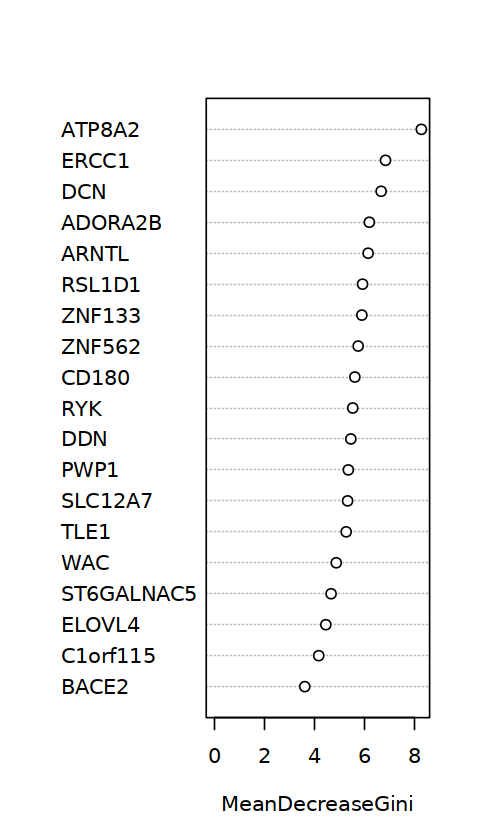

In [85]:
varImpPlot(rf,main = '')

In [86]:
rfGenes=importance[order(importance[, "MeanDecreaseGini"], decreasing  = TRUE),] #重要性评分大于2的基因

In [87]:
rfGenes

ATP8A2      ERCC1        DCN    ADORA2B      ARNTL     RSL1D1     ZNF133 
  8.273838   6.842192   6.666183   6.193964   6.145848   5.923345   5.894480 
    ZNF562      CD180        RYK        DDN       PWP1    SLC12A7       TLE1 
  5.747146   5.614974   5.529661   5.454468   5.353277   5.324527   5.267439 
       WAC ST6GALNAC5     ELOVL4   C1orf115      BACE2 
  4.870307   4.664457   4.453186   4.169250   3.611945

In [88]:
rfGenes=names(rfGenes[rfGenes>30]) 
write.table(rfGenes,file="rfGenes.txt",sep="\t",quote=F,col.names=F,row.names=F) #输出表达量

In [90]:
expr2 = exp4

In [91]:
sigExp=expr2[rfGenes,]
write.table(data.frame(ID=rownames(sigExp),sigExp),file="rfGeneExp.txt",sep="\t",quote=F,col.names=T,row.names=F) 

### svm

In [92]:
library(tidyverse)
library(glmnet)
library(VennDiagram)
library(e1071)
library(caret)
library(randomForest)

Warning message:
"package 'ggplot2' was built under R version 4.2.3"
Warning message:
"package 'tibble' was built under R version 4.2.3"
Warning message:
"package 'tidyr' was built under R version 4.2.3"
Warning message:
"package 'readr' was built under R version 4.2.3"
Warning message:
"package 'purrr' was built under R version 4.2.3"
Warning message:
"package 'stringr' was built under R version 4.2.3"
Warning message:
"package 'forcats' was built under R version 4.2.3"
Warning message:
"package 'lubridate' was built under R version 4.2.3"
Warning message in system("timedatectl", intern = TRUE):
"running command 'timedatectl' had status 1"
-- Attaching core tidyverse packages ------------------------ tidyverse 2.0.0 --
v forcats   1.0.0     v readr     2.1.4
v ggplot2   3.5.1     v stringr   1.5.0
v lubridate 1.9.2     v tibble    3.2.1
v purrr     1.0.2     v tidyr     1.3.1
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x randomForest::combine() mas

In [93]:
y=as.numeric(as.factor(Type))

In [94]:
library(future)
plan("multisession",workers=30)

Warning message:
"package 'future' was built under R version 4.2.3"

Attaching package: 'future'


The following object is masked from 'package:caret':

    cluster




In [95]:
set.seed(1)
rfeControl = rfeControl(functions = caretFuncs,
                        method = "cv", # 默认自助法重采样 boot
                        saveDetails = T, # 保存预测值和变量重要性
                        number = 5, # 重抽样次数
                        allowParallel = T # 允许多线程，用这个之前你要先准备好多线程！
                        )

In [ ]:
Profile=rfe(x=x,y=y,sizes = c(1:10),
    rfeControl =  rfeControl,
    methods="svmRadial")

Warning message in train.default(x, y, ...):
"You are trying to do regression and your outcome only has two possible values Are you trying to do classification? If so, use a 2 level factor as your outcome column."
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do

note: only 2 unique complexity parameters in default grid. Truncating the grid to 2 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

note: only 1 unique complexity parameters in default grid. Truncating the grid to 1 .



Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(x, y, mtry = param$mtry, ...):
"The response has five or fewer unique values.  Are you sure you want to do regression?"
Warning message in randomForest.default(

In [ ]:
pdf(file="SVM-RFE.pdf", width=6, height=5.5)
par(las=1)
x= Profile$results$Variables 
y =Profile$results$RMSE
plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
lines(x, y, col="darkgreen")
wmin=which.min(y) 
wmin.x=x[wmin] 
wmin.y=y[wmin]
points(wmin.x, wmin.y, col="blue", pch=16)
text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)
dev.off()

In [ ]:
par(las=1)
x= Profile$results$Variables 
y =Profile$results$RMSE
plot(x, y, xlab="Variables", ylab="RMSE (Cross-Validation)", col="darkgreen") 
lines(x, y, col="darkgreen")
wmin=which.min(y) 
wmin.x=x[wmin] 
wmin.y=y[wmin]
points(wmin.x, wmin.y, col="blue", pch=16)
text(wmin.x, wmin.y, paste0('N=', wmin.x), pos=2, col=2)

In [ ]:
#输出
featureGenes = Profile$optVariables
write.table(file="SVM-RFE.gene.txt",featureGenes,sep="\t",quote=F,row.names=F,col.names=F) #表达矩阵 

In [ ]:
featureGenes

### Boruta

In [ ]:
library(Boruta)

In [25]:
x = as.matrix(expr2)
y = Type

In [26]:
set.seed(1)
boruta <- Boruta(x=x, y=y, pValue=0.05, mcAdj=T, 
       maxRuns=300)

In [27]:
boruta

Boruta performed 299 iterations in 17.36726 secs.
 6 attributes confirmed important: DRD3, MAGEL2, MC3R, NTRK3, RELB and
1 more;
 11 attributes confirmed unimportant: CASP1, EGR1, GPR157, ID2, IL6 and
6 more;
 2 tentative attributes left: ATF4, PRF1;

In [28]:
table(boruta$finalDecision)


Tentative Confirmed  Rejected 
        2         6        11 

In [29]:
boruta$finalDecision

RPE65      DRD3      MC3R    GPR157      RELB     NFIL3       NMS      PRF1 
Confirmed Confirmed Confirmed  Rejected Confirmed  Rejected  Rejected Tentative 
   MAGEL2     CASP1       IL6      EGR1     PRKG2     NAMPT    PRKAA1     NRIP1 
Confirmed  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected  Rejected 
     ATF4       ID2     NTRK3 
Tentative  Rejected Confirmed 
Levels: Tentative Confirmed Rejected

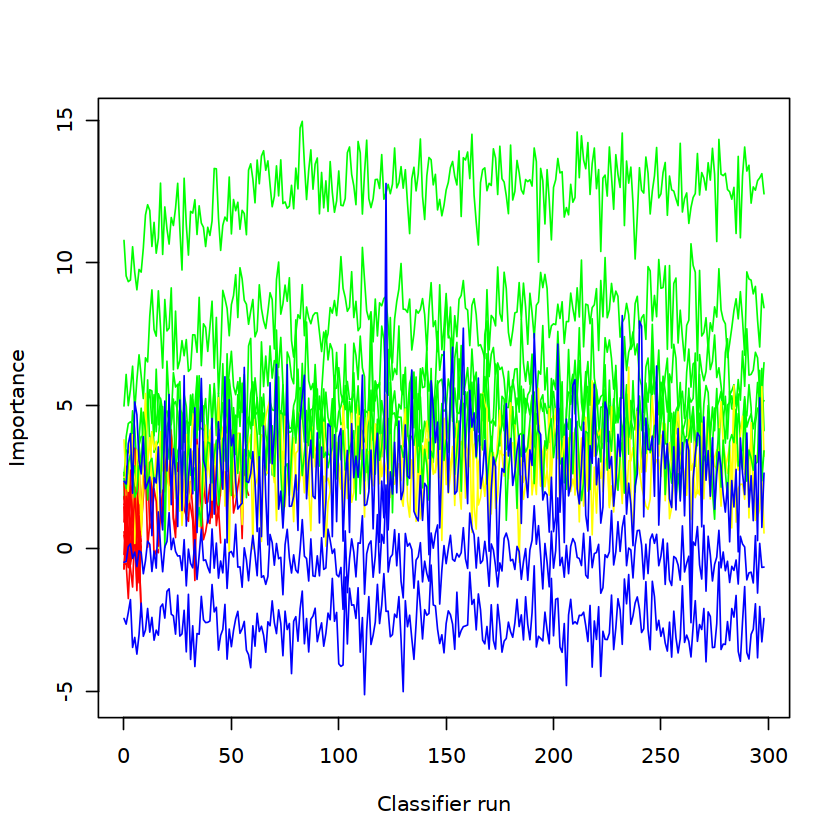

In [30]:
Boruta::plotImpHistory(boruta)

In [31]:
library(dplyr)
boruta.imp <- function(x){
  imp <- reshape2::melt(x$ImpHistory, na.rm=T)[,-1]
  colnames(imp) <- c("Variable","Importance")
  imp <- imp[is.finite(imp$Importance),]

  variableGrp <- data.frame(Variable=names(x$finalDecision), 
                            finalDecision=x$finalDecision)

  showGrp <- data.frame(Variable=c("shadowMax", "shadowMean", "shadowMin"),
                        finalDecision=c("shadowMax", "shadowMean", "shadowMin"))

  variableGrp <- rbind(variableGrp, showGrp)

  boruta.variable.imp <- merge(imp, variableGrp, all.x=T)

  sortedVariable <- boruta.variable.imp %>% group_by(Variable) %>% 
    summarise(median=median(Importance)) %>% arrange(median)
  sortedVariable <- as.vector(sortedVariable$Variable)


  boruta.variable.imp$Variable <- factor(boruta.variable.imp$Variable, levels=sortedVariable)

  invisible(boruta.variable.imp)
}
boruta.variable.imp <- boruta.imp(boruta)


In [32]:
boruta

Boruta performed 299 iterations in 17.36726 secs.
 6 attributes confirmed important: DRD3, MAGEL2, MC3R, NTRK3, RELB and
1 more;
 11 attributes confirmed unimportant: CASP1, EGR1, GPR157, ID2, IL6 and
6 more;
 2 tentative attributes left: ATF4, PRF1;

Welcome to YSX package which is a collection of useful scripts.
This package does not require you install all depended packages, since one may not need all functions in this package.
However, when there is a message implying some functions are missing,please install these packages manually.
Or more specially, check Plot.Rmd in vignettes first.




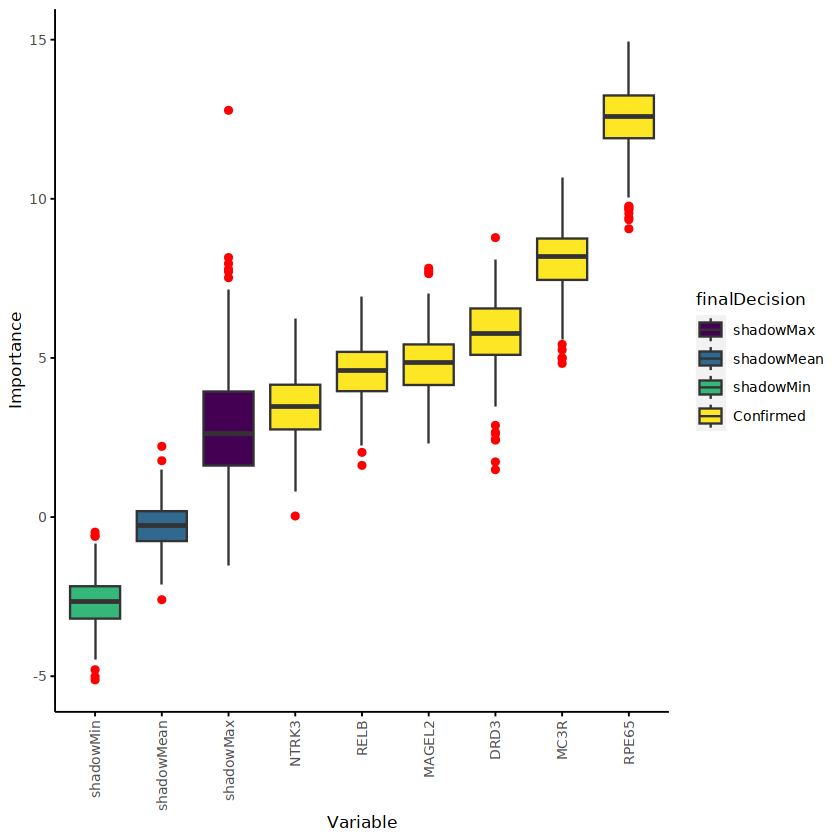

In [33]:
library(YSX)

sp_boxplot(boruta.variable.imp, melted=T, xvariable = "Variable", yvariable = "Importance",
           legend_variable = "finalDecision", legend_variable_order = c("shadowMax", "shadowMean", "shadowMin", "Confirmed"),
           xtics_angle = 90)

In [52]:
expr3 = expr[,-1]

In [53]:
set.seed(147)  
index <-  which( (1:nrow(expr3))%%3 == 0 )
train <- expr3[-index,]
test <- expr3[index,]

In [54]:
table(test$Group)


CON MDD 
 13   6 

In [55]:
library("xgboost")
library("Matrix")
train_matrix <- sparse.model.matrix(Group ~ .-1, data = train)
test_matrix <- sparse.model.matrix(Group ~ .-1, data = test)
all_matrix <- sparse.model.matrix(Group ~ .-1, data = expr3)


Attaching package: 'xgboost'


The following object is masked from 'package:dplyr':

    slice




In [56]:
train_label <- as.numeric(train$Group == 'MDD')
test_label <-  as.numeric(test$Group == 'MDD')
all_label <-  as.numeric(expr3$Group == 'MDD')

In [57]:
all_label

[1] 0 1 0 0 0 0 1 1 0 1 1 0 1 1 1 1 1 0 1 0 1 0 0 0 1 0 0 0 1 1 1 1 0 0 1 1 0 0
[39] 0 1 0 1 1 1 0 1 1 0 1 1 1 1 1 0 0 0 0 0 0

In [58]:
train_fin <- list(data=train_matrix,label=train_label) 
test_fin <- list(data=test_matrix,label=test_label) 
all_fin <- list(data=all_matrix,label=all_label) 

dtrain <- xgb.DMatrix(data = train_fin$data, label = train_fin$label) 
dtest <- xgb.DMatrix(data = test_fin$data, label = test_fin$label)
dall <- xgb.DMatrix(data = all_fin$data, label = all_fin$label)

In [59]:
xgb <- xgboost(data = dall,max_depth=6, eta=0.5,  
  objective='binary:logistic', nround=25)

[1]	train-logloss:0.478091 
[2]	train-logloss:0.352804 
[3]	train-logloss:0.258811 
[4]	train-logloss:0.211613 
[5]	train-logloss:0.172575 
[6]	train-logloss:0.146544 
[7]	train-logloss:0.129008 
[8]	train-logloss:0.115318 
[9]	train-logloss:0.104847 
[10]	train-logloss:0.097022 
[11]	train-logloss:0.088329 
[12]	train-logloss:0.082849 
[13]	train-logloss:0.078132 
[14]	train-logloss:0.075979 
[15]	train-logloss:0.071095 
[16]	train-logloss:0.067425 
[17]	train-logloss:0.066081 
[18]	train-logloss:0.064840 
[19]	train-logloss:0.063535 
[20]	train-logloss:0.061872 
[21]	train-logloss:0.060941 
[22]	train-logloss:0.060025 
[23]	train-logloss:0.058967 
[24]	train-logloss:0.058081 
[25]	train-logloss:0.057269 


In [60]:
xgb

##### xgb.Booster
raw: 24.9 Kb 
call:
  xgb.train(params = params, data = dtrain, nrounds = nrounds, 
    watchlist = watchlist, verbose = verbose, print_every_n = print_every_n, 
    early_stopping_rounds = early_stopping_rounds, maximize = maximize, 
    save_period = save_period, save_name = save_name, xgb_model = xgb_model, 
    callbacks = callbacks, max_depth = 6, eta = 0.5, objective = "binary:logistic")
params (as set within xgb.train):
  max_depth = "6", eta = "0.5", objective = "binary:logistic", validate_parameters = "TRUE"
xgb.attributes:
  niter
callbacks:
  cb.print.evaluation(period = print_every_n)
  cb.evaluation.log()
# of features: 19 
niter: 25
nfeatures : 19 
evaluation_log:
    iter train_logloss
       1    0.47809129
       2    0.35280428
---                   
      24    0.05808055
      25    0.05726944

Feature,Gain,Cover,Frequency
<chr>,<dbl>,<dbl>,<dbl>
RPE65,0.33864590,0.22560071,0.1833333
MC3R,0.17055998,0.13723158,0.1000000
DRD3,0.14845647,0.18209376,0.1833333
PRF1,0.06880924,0.11357960,0.1500000
NFIL3,0.06226312,0.11330105,0.1500000
MAGEL2,0.05993992,0.05571085,0.0500000


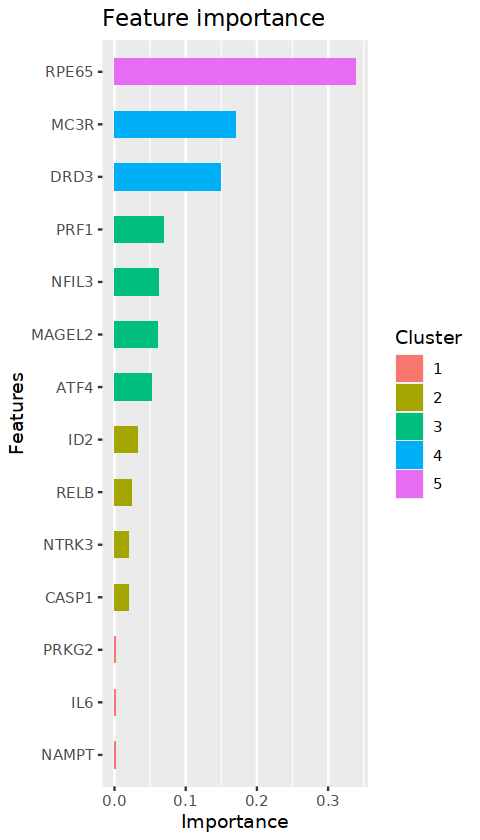

In [61]:
importance <- xgb.importance(all_matrix@Dimnames[[2]], model = xgb)  
head(importance)
xgb.ggplot.importance(importance)

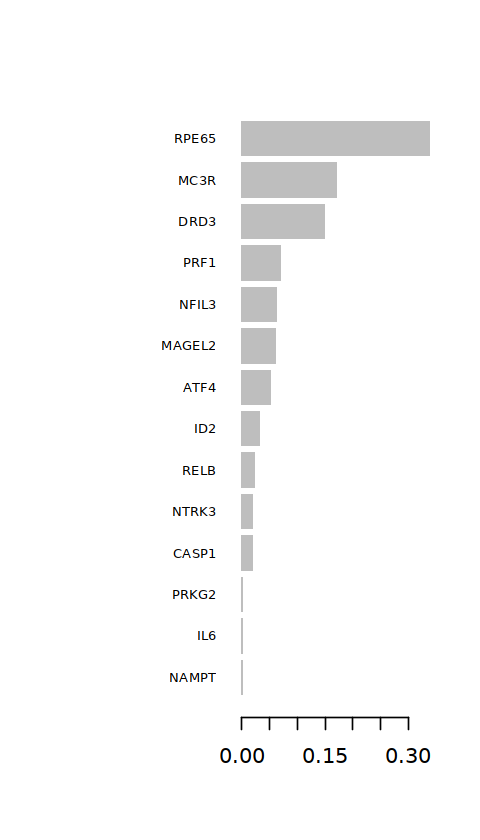

In [62]:
xgb.plot.importance(importance)

### 韦恩图

In [65]:
RF.gene = colnames(sigExp)
SVF.RFE.gene = featureGenes
XGBoost.gene = importance$Feature

In [66]:
boruta.variable.imp2 = boruta.variable.imp %>% dplyr::filter(finalDecision %in% c('Confirmed','Tentative')) %>% dplyr::select(Variable) %>% unique()

In [67]:
Boruta.gene = as.vector(boruta.variable.imp2$Variable)

In [68]:
list1 = list(RF.gene,SVF.RFE.gene,Boruta.gene,XGBoost.gene)

In [69]:
data =  as.data.frame (do.call (cbind, list1))

Warning message in (function (..., deparse.level = 1) :
"number of rows of result is not a multiple of vector length (arg 2)"


In [70]:

library(venn)
        library(VennDiagram)
        color=c( "#3C5488B2","#00A087B2", 
             "#F39B7FB2","#91D1C2B2", 
             "#8491B4B2", "#DC0000B2", 
             "#7E6148B2","yellow", 
             "darkolivegreen1", "lightskyblue", 
             "darkgreen", "deeppink", "khaki2", 
             "firebrick", "brown1", "darkorange1", 
             "cyan1", "royalblue4", "darksalmon", 
             "darkgoldenrod1", "darkseagreen", "darkorchid")

    if (ncol(data) == 2){
        sample_list <- list(c1 = data[,1], c2 = data[,2])
    }else if(ncol(data) == 3){
        sample_list <- list(RF.gene = data[,1], Boruta.gene = data[,2], XGBoost.gene = data[,3])
    }else if(ncol(data) == 4){
        sample_list <- list(RF.gene = data[,1], SVF.RFE.gene = data[,2], Boruta.gene = data[,3], XGBoost.gene = data[,4])
    }else{
        sample_list <- list(c1 = data[,1], c2 = data[,2], c3 = data[,3], c4 = data[,4], c5 = data[,5])
    }
    
    q <- venn.diagram(sample_list,filename = NULL,
             fill = color[1:(length(sample_list))],
             alpha = 0.50, cat.col = rep('black', ncol(data)), 
             col = 'black', cex = 1, fontfamily = 'serif', cat.cex = 1, cat.fontfamily = 'serif', margin = 0.2
                             )
    pdf(paste0('./',"venn.pdf"))
    grid.draw(q)
    dev.off()

Warning message:
"package 'venn' was built under R version 4.2.3"


png 
  2

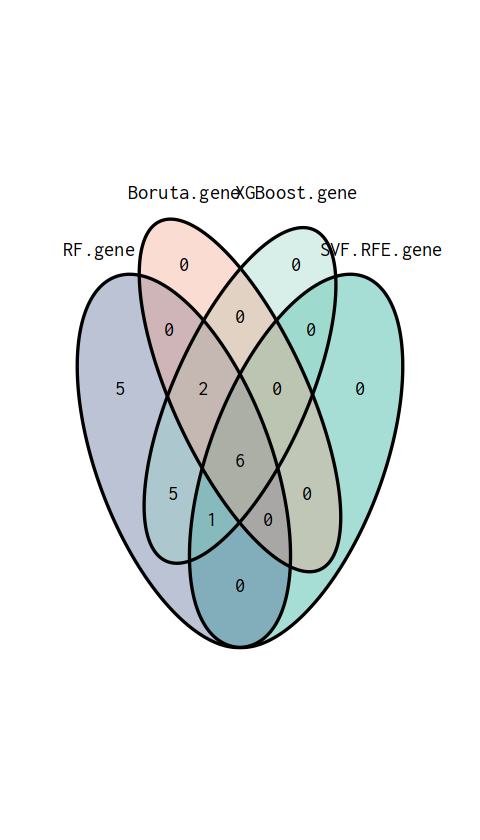

In [71]:
grid.draw(q)

In [72]:
model.gene = intersect(intersect(intersect(RF.gene,XGBoost.gene),Boruta.gene),SVF.RFE.gene)

In [73]:
model.gene

[1] "RPE65" "DRD3"  "MC3R"  "RELB"  "PRF1"  "NTRK3"

In [74]:
set.seed(1234)

In [80]:
expr3[expr3$Group =='MDD',]$Group<-1

In [81]:

expr3[expr3$Group =='CON',]$Group<-0
expr3$Group = as.numeric(expr3$Group)

In [82]:
expr4 = expr3 %>% dplyr::select(c(Group,model.gene))

In [83]:
dim(expr4)

[1] 59  7

In [84]:
head(expr4,4)

,Group,RPE65,DRD3,MC3R,RELB,PRF1,NTRK3
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
V1,0,3.694608,0,1.318140,4.548540,2.801941,12.36519
V10,1,2.381054,0,0.000000,3.526436,0.000000,10.11376
V11,0,4.295561,0,0.000000,4.295561,0.000000,12.15638
V12,0,4.934257,0,1.571256,4.934257,2.789708,12.40487


In [85]:
library(caret)
library(ggplot2)

In [159]:
for (i in model.gene){
    res<-pROC::roc(Group~expr4[,i],data=expr4,aur=TRUE,
         ci=TRUE, # 显示95%CI
         #percent=TRUE, # 是否需要以百分比显示
         smooth=FALSE,# 是否平滑曲线
         levels=c(0,1),direction=">" #设置分组方向
         )

p = pROC::ggroc(res, color ="red",legacy.axes = TRUE)+
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), color="darkgrey", linetype=4)+
  theme_bw() + # 设置背景
  ggtitle(paste0(i," ROC Curve"))+
  theme(plot.title = element_text(hjust = 0.5,size = 16),
        axis.text=element_text(size=12,colour = "black"),
        axis.title.x = element_text(size = 14),
        axis.title.y = element_text(size = 14))
p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
  annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))
    ggsave(file = paste0(i,'.ROC.pdf'))
}

Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image
Saving 6.67 x 6.67 in image


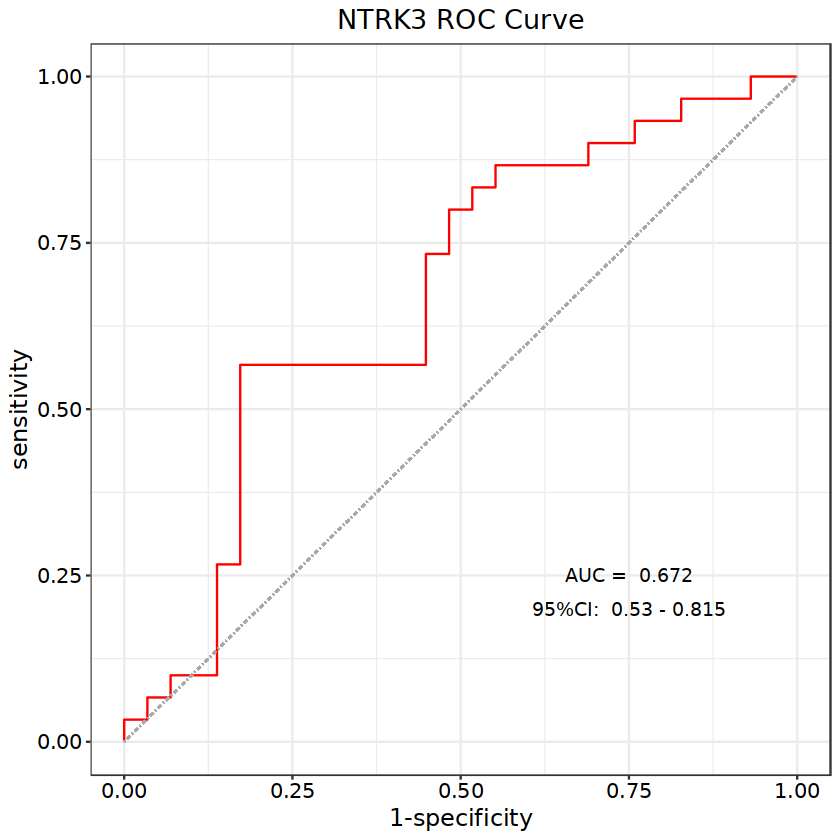

In [285]:
p+annotate("text",x=0.75,y=0.25,label=paste("AUC = ", round(res$auc,3)))+
  annotate("text",x=0.75,y=0.20,label=paste("95%CI: ", round(res$ci[1],3),'-',round(res$ci[3],3)))

### 批量单因素逻辑回归

In [123]:
#expr4 = expr3

In [86]:
#结果合并需要的包
library(plyr)
#可进行logistic回归的包
library(rms)#可实现逻辑回归模型（lrm）
library(epiDisplay)#快速输出OR、95%CI、P
#library(gtsummary)#精美三线表（但，95%CI有误）

------------------------------------------------------------------------------

You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)

------------------------------------------------------------------------------


Attaching package: 'plyr'


The following object is masked from 'package:purrr':

    compact


The following objects are masked from 'package:dplyr':

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize


Loading required package: Hmisc

Warning message:
"package 'Hmisc' was built under R version 4.2.3"

Attaching package: 'Hmisc'


The following objects are masked from 'package:plyr':

    is.discrete, summarize


The following object is masked from 'package:e1071':

    impute


The following objects are masked from 'package:dplyr':

    src, summarize


The following objects are masked from 'package:base':

    for

In [87]:
varsU<-names(expr4[,2:7])

In [88]:
Result<-c()
for (i in 1:length(varsU)){
  fit<-glm(substitute(Group~x,list(x=as.name(varsU[i]))),data=expr4,family=binomial())
  fitSum<-summary(fit)
  result1<-c()
  result1<-rbind(result1,fitSum$coef)
  OR<-exp(fitSum$coef[,'Estimate'])
  result1<-data.frame(cbind(result1,cbind(OR,exp(confint(fit)))))
  result1$Characteristics<-varsU[i]   #添加变量名
  Result<-rbind(Result,result1[-1,])#[-1,],删除常数项
}

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...

Waiting for profiling to be done...



In [89]:
Result

,Estimate,Std..Error,z.value,Pr...z..,OR,X2.5..,X97.5..,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
RPE65,-1.2852920,0.4121727,-3.118334,0.001818767,0.2765698,0.10870211,0.5587258,RPE65
DRD3,-1.1671551,0.4125723,-2.828971,0.004669792,0.3112512,0.13163476,0.6740901,DRD3
MC3R,-1.2395370,0.4667983,-2.655402,0.007921404,0.2895182,0.10748390,0.6851104,MC3R
RELB,-1.1927865,0.5375968,-2.218738,0.026504554,0.3033747,0.09270476,0.7868757,RELB
PRF1,-0.5299192,0.2579886,-2.054041,0.039971716,0.5886525,0.33976865,0.9495081,PRF1
NTRK3,-1.6303617,0.9504679,-1.715325,0.086285581,0.1958587,0.02440798,1.0182358,NTRK3


In [90]:
Uni_log<-data.frame(Result[,c(1,4:8)]) #提取"P","OR","CIlower","CIupper"和变量名

colnames(Uni_log)[2:5]<-c("P","OR","CIlower","CIupper")#变量重命名

ExtractVar<-unique(Uni_log$Characteristics[Uni_log$"P"<0.05]) 

In [91]:
tzgene = Uni_log %>% dplyr::filter(P < 0.05) %>% rownames()

In [92]:
Uni_log[model.gene,]

,Estimate,P,OR,CIlower,CIupper,Characteristics
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
RPE65,-1.2852920,0.001818767,0.2765698,0.10870211,0.5587258,RPE65
DRD3,-1.1671551,0.004669792,0.3112512,0.13163476,0.6740901,DRD3
MC3R,-1.2395370,0.007921404,0.2895182,0.10748390,0.6851104,MC3R
RELB,-1.1927865,0.026504554,0.3033747,0.09270476,0.7868757,RELB
PRF1,-0.5299192,0.039971716,0.5886525,0.33976865,0.9495081,PRF1
NTRK3,-1.6303617,0.086285581,0.1958587,0.02440798,1.0182358,NTRK3


### 多因素分析

In [93]:
tzgene

[1] "RPE65" "DRD3"  "MC3R"  "RELB"  "PRF1"

In [94]:
data = expr4[,c('Group',tzgene)]

In [95]:


# train_sub = sample(nrow(data),9/10*nrow(data))
# train_data = data[train_sub,]
# test_data =data[-train_sub,]

fit.reduce<-glm(Group~.,data=data,family=binomial())
summary(fit.reduce)

formatFit<-function(fit){
  #取P值
  p<-summary(fit)$coefficients[,4]
  #wald值
  wald<-summary(fit)$coefficients[,3]^2
  #B值
  valueB<-coef(fit)
  #OR值
  valueOR<-exp(coef(fit))
  #OR值得95%CI
  confitOR<-exp(confint(fit))
  data.frame(
    B=round(valueB,3),
    Wald=round(wald,3),
    OR_with_CI=paste(round(valueOR,3),"(",
               round(confitOR[,1],3),"~",round(confitOR[,2],3),")",sep=""),
    P=format.pval(p,digits = 3,eps=0.001)
  )
}

formatFit(fit.reduce)


Call:
glm(formula = Group ~ ., family = binomial(), data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.09279  -0.70183   0.02053   0.72513   1.84444  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   9.1037     4.5460   2.003   0.0452 * 
RPE65        -1.4752     0.5688  -2.594   0.0095 **
DRD3         -1.0804     0.5528  -1.954   0.0507 . 
MC3R         -1.2752     0.5846  -2.182   0.0291 * 
RELB         -0.1619     0.7859  -0.206   0.8367   
PRF1         -0.7167     0.4253  -1.685   0.0920 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 81.774  on 58  degrees of freedom
Residual deviance: 50.977  on 53  degrees of freedom
AIC: 62.977

Number of Fisher Scoring iterations: 6


Waiting for profiling to be done...



,B,Wald,OR_with_CI,P
,<dbl>,<dbl>,<chr>,<chr>
(Intercept),9.104,4.010,8988.179(4.418~316344330.658),0.045
RPE65,-1.475,6.727,0.229(0.064~0.611),0.009
DRD3,-1.080,3.819,0.339(0.104~0.945),0.051
MC3R,-1.275,4.759,0.279(0.078~0.819),0.029
RELB,-0.162,0.042,0.85(0.162~3.803),0.837
PRF1,-0.717,2.840,0.488(0.196~1.073),0.092


In [96]:
fit.reduce<-glm(Group~RPE65 + MC3R+DRD3 +RELB + PRF1 ,data=data,family=binomial())
summary(fit.reduce)


Call:
glm(formula = Group ~ RPE65 + MC3R + DRD3 + RELB + PRF1, family = binomial(), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.09279  -0.70183   0.02053   0.72513   1.84444  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   9.1037     4.5460   2.003   0.0452 * 
RPE65        -1.4752     0.5688  -2.594   0.0095 **
MC3R         -1.2752     0.5846  -2.182   0.0291 * 
DRD3         -1.0804     0.5528  -1.954   0.0507 . 
RELB         -0.1619     0.7859  -0.206   0.8367   
PRF1         -0.7167     0.4253  -1.685   0.0920 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 81.774  on 58  degrees of freedom
Residual deviance: 50.977  on 53  degrees of freedom
AIC: 62.977

Number of Fisher Scoring iterations: 6


In [97]:
summary(fit.reduce) #查看构建的模型
fitted.prob<-predict(fit.reduce, newdata = data, type = "response")  #这里不需要变动
data$pred<-fit.reduce$fitted.values
m<-pROC::roc(data$Group,data[,"pred"])  #这里要把Y改为自己的结局变量即可


Call:
glm(formula = Group ~ RPE65 + MC3R + DRD3 + RELB + PRF1, family = binomial(), 
    data = data)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-2.09279  -0.70183   0.02053   0.72513   1.84444  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)   9.1037     4.5460   2.003   0.0452 * 
RPE65        -1.4752     0.5688  -2.594   0.0095 **
MC3R         -1.2752     0.5846  -2.182   0.0291 * 
DRD3         -1.0804     0.5528  -1.954   0.0507 . 
RELB         -0.1619     0.7859  -0.206   0.8367   
PRF1         -0.7167     0.4253  -1.685   0.0920 . 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 81.774  on 58  degrees of freedom
Residual deviance: 50.977  on 53  degrees of freedom
AIC: 62.977

Number of Fisher Scoring iterations: 6


Setting levels: control = 0, case = 1

Setting direction: controls < cases



In [99]:
options(repr.plot.width = 6)

Area under the curve: 0.8747

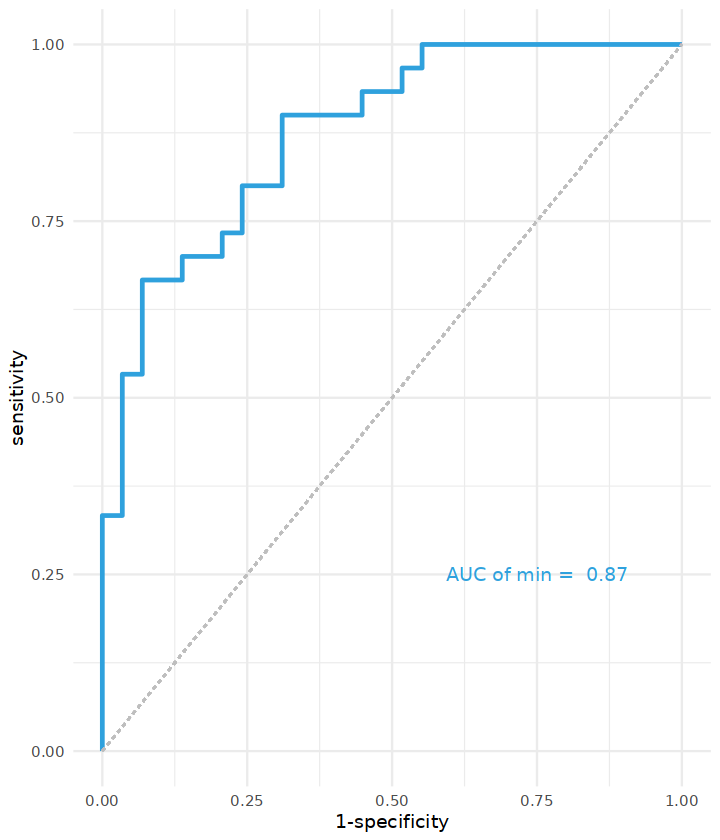

In [100]:
g <- pROC::ggroc(m,legacy.axes = T,size = 1,color = "#2fa1dd")
pROC::auc(m)  # Area under the curve: 0.9953

g + theme_minimal() +
  geom_segment(aes(x = 0, xend = 1, y = 0, yend = 1), 
               colour = "grey", linetype = "dashed")+
  annotate("text",x = .75, y = .25,
           label = paste("AUC of min = ",format(round(as.numeric(pROC::auc(m)),2),nsmall = 2)),color = "#2fa1dd")

In [101]:
library(ROCR)

Warning message:
"package 'ROCR' was built under R version 4.2.3"


In [102]:
dd<-datadist(data)  #开始打包数据
options(datadist="dd")

In [103]:
data$Group = as.factor(data$Group)

In [104]:
fit1 <- lrm(Group~RPE65 + DRD3+ MC3R+RELB  + PRF1, data=data,x=T,y=T)


In [105]:
fit1

Logistic Regression Model

lrm(formula = Group ~ RPE65 + DRD3 + MC3R + RELB + PRF1, data = data, 
    x = T, y = T)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs            59    LR chi2      30.80     R2       0.542    C       0.875    
 0             29    d.f.             5     R2(5,59) 0.354    Dxy     0.749    
 1             30    Pr(> chi2) <0.0001    R2(5,44.2)0.442    gamma   0.749    
max |deriv| 3e-09                           Brier    0.146    tau-a   0.381    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept  9.1037 4.5460  2.00  0.0452  
RPE65     -1.4752 0.5688 -2.59  0.0095  
DRD3      -1.0804 0.5528 -1.95  0.0507  
MC3R      -1.2752 0.5846 -2.18  0.0291  
RELB      -0.1619 0.7859 -0.21  0.8367  
PRF1      -0.7167 0.4253 -1.69  0.0920  


In [106]:
#  https://blog.csdn.net/Ayue0616/article/details/126601832

In [107]:
# cal1 <- calibrate(fit1, method='boot', B=1000) 
# plot(cal1,xlim=c(0,1.0),ylim=c(0,1.0))

### https://blog.51cto.com/u_15172991/5428282  模型图的解释参考链接

In [117]:
# https://ayueme.github.io/R_clinical_model/nomogram-essential.html

In [ ]:
# https://blog.csdn.net/Dr_long1996/article/details/135446784

In [118]:
fit1

Logistic Regression Model

lrm(formula = Group ~ RPE65 + DRD3 + MC3R + RELB + PRF1, data = data, 
    x = T, y = T)

                       Model Likelihood     Discrimination    Rank Discrim.    
                             Ratio Test            Indexes          Indexes    
Obs            59    LR chi2      30.80     R2       0.542    C       0.875    
 0             29    d.f.             5     R2(5,59) 0.354    Dxy     0.749    
 1             30    Pr(> chi2) <0.0001    R2(5,44.2)0.442    gamma   0.749    
max |deriv| 3e-09                           Brier    0.146    tau-a   0.381    

          Coef    S.E.   Wald Z Pr(>|Z|)
Intercept  9.1037 4.5460  2.00  0.0452  
RPE65     -1.4752 0.5688 -2.59  0.0095  
DRD3      -1.0804 0.5528 -1.95  0.0507  
MC3R      -1.2752 0.5846 -2.18  0.0291  
RELB      -0.1619 0.7859 -0.21  0.8367  
PRF1      -0.7167 0.4253 -1.69  0.0920  


In [109]:
save(fit1,data,file = 'bulk2.fit1.rda')

In [110]:
#列线图代码只能在Rstudio话

In [111]:
# library('regplot')
# regplot(fit1,
#         plots = c("violin", "boxes"), ##连续性变量形状，可选"no plot" "density" "boxes" "ecdf" "bars" "boxplot" "violin" "bean" "spikes"；分类变量的形状，可选"no plot" "boxes" "bars" "spikes"
#         observation = data[1,], #用哪行观测，或者T F
#         center = T, # 对齐变量
#         subticks = T,
#         droplines = T,#是否画竖线
#         title = "nomogram",
#         points = T, # 截距项显示为0-100
#         odds = T, # 是否显示OR值
#         showP = T, # 是否显示变量的显著性标记
#         rank = "sd", # 根据sd给变量排序
#         interval="confidence", # 展示可信区间
#         clickable = F # 是否可以交互
# )

In [112]:
fit.result<-summary(fit.reduce)
df1<-fit.result$coefficients
df2<-confint(fit.reduce)
df3<-cbind(df1,df2)
df4<-data.frame(df3[-1,c(1,4,5,6)])
df4$Var<-rownames(df4)
colnames(df4)<-c("OR","Pvalue","OR_1","OR_2","Var")
df5<-df4[,c(5,1,2,3,4)]
df5$OR_mean<-df5$OR
df5$OR<-paste0(round(df5$OR,2),
               "(",
               round(df5$OR_1,2),
               "~",
               round(df5$OR_2,2),
               ")")
df5$Pvalue<-round(df5$Pvalue,3)
write.csv(df5,file = "forestplot_example.csv",
          quote = F,row.names = F)

Waiting for profiling to be done...



In [116]:
library(forestplot)
fp<-read.csv("forestplot_example.csv",header=T)

# forestplot(labeltext=as.matrix(fp[,1:3]),
#            mean=fp$OR_mean,
#            lower=fp$OR_1,
#            upper=fp$OR_2,
#            zero=0,
#            boxsize=0.2,
#            graph.pos=2)

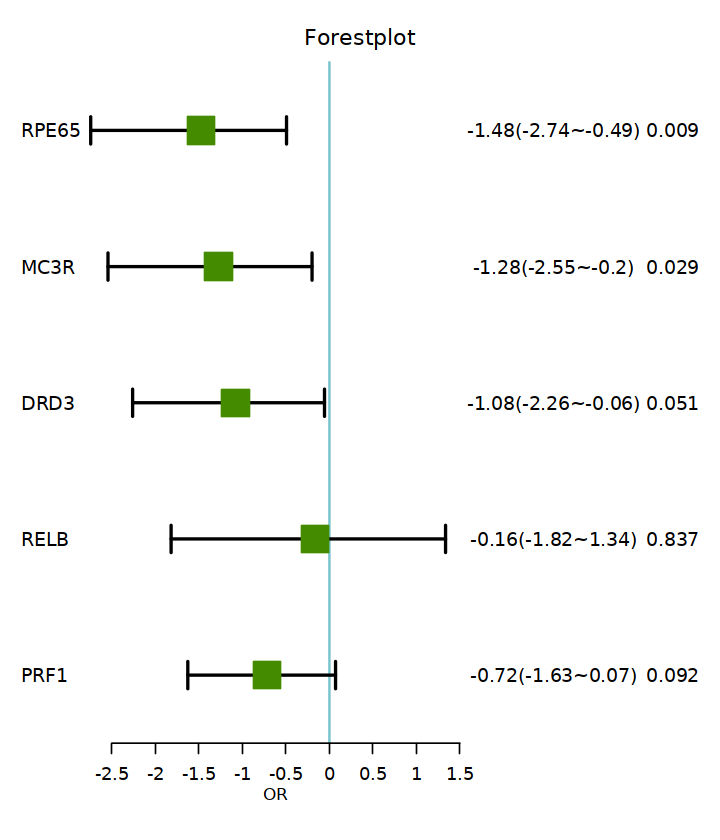

In [115]:
forestplot(labeltext=as.matrix(fp[,1:3]),
           mean=fp$OR_mean,
           lower=fp$OR_1,
           upper=fp$OR_2,
           zero=0,
           boxsize=0.2,
           lineheight = unit(7,'mm'),
           colgap=unit(2,'mm'),
           lwd.zero=1.5,
           lwd.ci=2, 
           col=fpColors(box='#458B00',
                        summary='#8B008B',
                        lines = 'black',
                        zero = '#7AC5CD'),
           xlab="OR",
           lwd.xaxis =1,
           txt_gp = fpTxtGp(ticks = gpar(cex = 0.85),
                            xlab  = gpar(cex = 0.8),
                            cex = 0.9),
           lty.ci = "solid",
           title = "Forestplot", 
           line.margin = 0.08,
           graph.pos=2)


In [209]:
nmfinput= data[MDD,c('RPE65' ,'DRD3','MC3R','RELB' , 'PRF1')] %>%  t() %>%  as.data.frame()

In [210]:
library(NMF)

In [211]:
ranks <- 1:10
estim.coad <- nmf(nmfinput,ranks, nrun=10)
duplicated(colnames(nmfinput))

Warning message in cor(d.consensus, d.coph, method = "pearson"):
"the standard deviation is zero"


[1] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[13] FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE FALSE
[25] FALSE FALSE FALSE FALSE FALSE FALSE

Warning message:
"Removed 3 rows containing missing values (`geom_line()`)."
Warning message:
"Removed 11 rows containing missing values (`geom_point()`)."


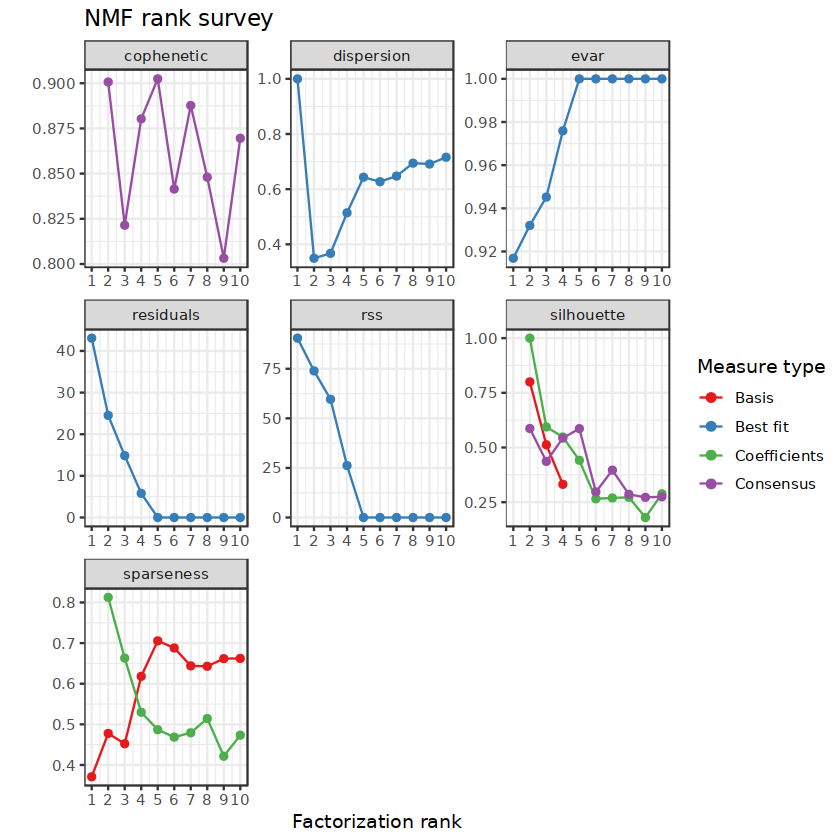

In [212]:
plot(estim.coad)

In [213]:
seed = 2020820
nmf.rank4 <- nmf(nmfinput, 
                 rank = 2, 
                 nrun=50,
                 seed = seed, 
                 method = "brunet")

group
 1  2 
21  9 

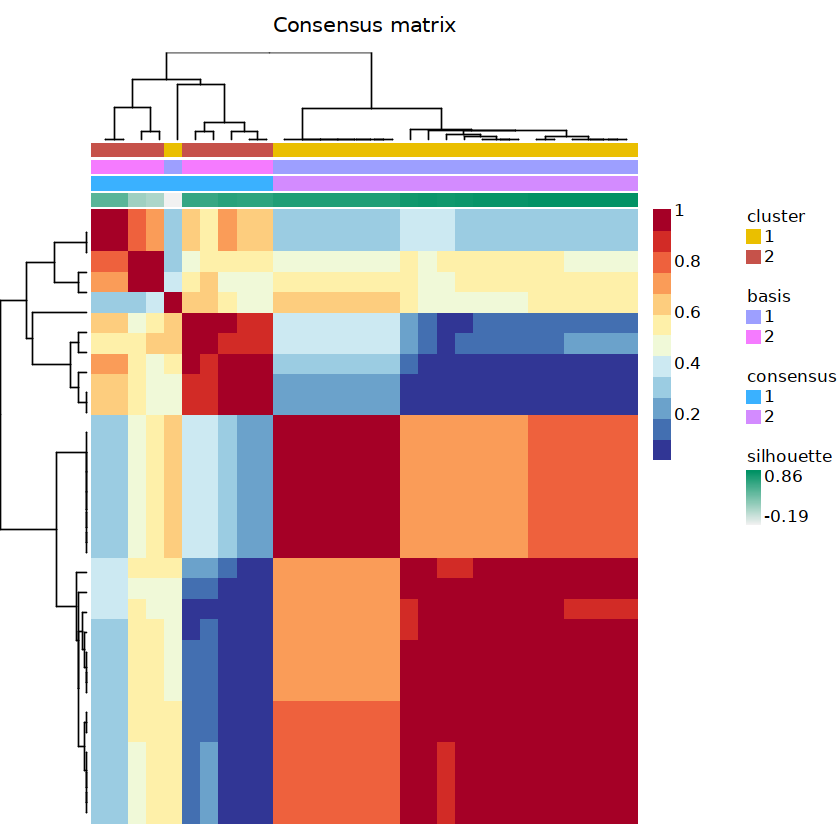

In [214]:
jco <- c("#EABF00","#C6524A","#868686")
index <- extractFeatures(nmf.rank4,"max") 
sig.order <- unlist(index)
NMF.Exp.rank4 <- nmfinput[sig.order,]
NMF.Exp.rank4 <- na.omit(NMF.Exp.rank4) #sig.order有时候会有缺失值
group <- predict(nmf.rank4) # 提出亚型
table(group)
consensusmap(nmf.rank4,
             labRow = NA,
             labCol = NA,
             annCol = data.frame("cluster"=group[colnames(NMF.Exp.rank4)]),
             annColors = list(cluster=c("1"=jco[1],"2"=jco[2])))

In [215]:
library(tinyarray)

In [225]:
data1 = data[MDD,-1] %>%  t() %>% as.data.frame()

In [226]:
a = data1[,colnames(nmfinput)]

In [227]:
cg=names(tail(sort(apply(a,1,sd)),12000))
n=a[cg,]

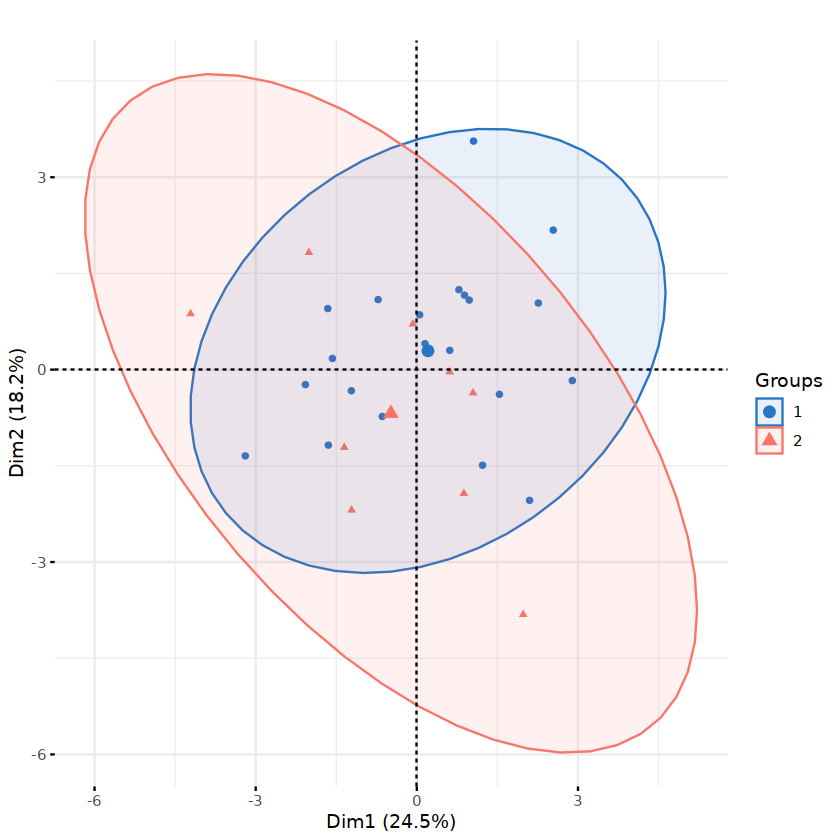

In [228]:
draw_pca(n,group)

In [231]:
library(Rtsne)
tsne_out = Rtsne(t(n),perplexity = 1)
pdat = data.frame(tsne_out$Y,factor(group))
colnames(pdat) = c("Y1","Y2","group")
head(pdat)

,Y1,Y2,group
,<dbl>,<dbl>,<fct>
V10,49.59959,172.010281,2
V15,207.23713,-79.947753,2
V16,201.56723,-89.036425,1
V18,-43.43508,3.824127,2
V19,-185.23555,98.308446,1
V20,-37.09595,-82.671437,1


In [294]:
pdat1 = pdat %>% tibble::rownames_to_column(.,'sample')

In [295]:
bulk2.group = pdat1[,c(1,4)]
write.csv(bulk2.group,file = 'bulk2.group.csv',row.names =F)

In [296]:
dim(bulk2.group)

[1] 30  2

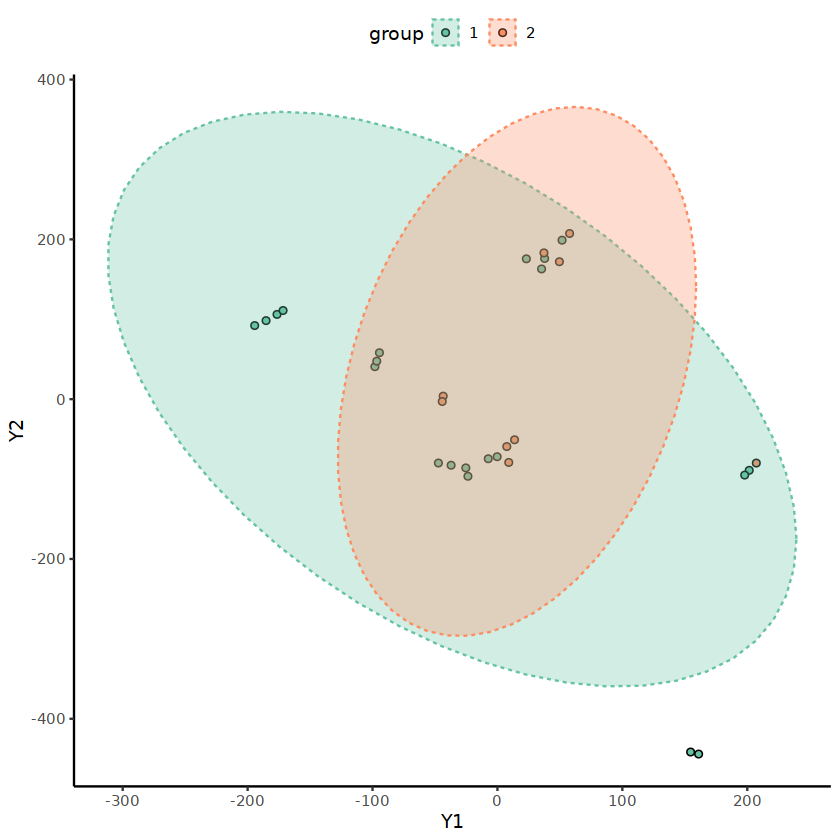

In [232]:
library(ggplot2)
library(paletteer)
ggplot(pdat,aes(Y1,Y2))+
  geom_point(aes(Y1,Y2,fill = group),shape = 21,color = "black")+
  stat_ellipse(aes(color = group,fill = group),
               geom = "polygon",
               alpha = 0.3,
               linetype = 2)+
  scale_color_paletteer_d("RColorBrewer::Set2")+
  scale_fill_paletteer_d("RColorBrewer::Set2")+
  theme_classic()+
  theme(legend.position = "top")